# **What's the Purpose of Feature Selection**
Many learning algorithms perform poorly on high-dimensional data. This is known as the curse of dimensionality

There are other reasons we may wish to reduce the number of features including:

1. Reducing computational cost

2. Reducing the cost associated with data collection

3. Improving Interpretability

# **Dataset: Colon Cancer Data**

**Dependent Variable:**

status:	0=death, 1=censored

**Explanatory Variables:**

id:	id

study:	1 for all patients

rx:	Treatment - Obs(ervation) - 1, Lev(amisole) - 2, Lev(amisole)+5-FU - 3

sex:	1=male, 0=female

age:	in years

obstruct:	obstruction of colon by tumour

perfor:	perforation of colon

adhere:	adherence to nearby organs

nodes:	number of lymph nodes with detectable cancer

time:	days until event or censoring

differ:	differentiation of tumour (1=well, 2=moderate, 3=poor)

extent:	Extent of local spread (1=submucosa, 2=muscle, 3=serosa, 4=contiguous structures)

surg:	time from surgery to registration (0=short, 1=long)

node4:	more than 4 positive lymph nodes

### ***Import required libraries***

In [ ]:
import pandas as pd
import numpy as np

### ***Read the dataset***



In [ ]:
df=pd.read_csv("colon.csv")
df.head()

,id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time
0,1,1,3,1,43,0,0,0,5.0,1,2.0,3,0,1,1521
1,2,1,3,1,63,0,0,0,1.0,0,2.0,3,0,0,3087
2,3,1,1,0,71,0,0,1,7.0,1,2.0,2,0,1,963
3,4,1,3,0,66,1,0,0,6.0,1,2.0,3,1,1,293
4,5,1,1,1,69,0,0,0,22.0,1,2.0,3,1,1,659


In [ ]:
# delete rows from dataframe containing NULL values
df=df.dropna()

In [ ]:
# taking independent and dependent variables
X = df.drop(columns='status')
y = df.status

In [ ]:
# number of features before feature selection is 14
X.columns.size

14

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt

cv = KFold(n_splits=10, random_state=2, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE: 0.33
R_squared: 0.56


### ***Feature selection***

In [ ]:
# we can remove the "id" as it has no relatiom with the the outcome
df=df.drop(columns=['id'])

# **Filter Features by Variance**

In [ ]:
df.var()

study            0.000000
rx               0.669348
sex              0.249957
age            141.955148
obstruct         0.155661
perfor           0.029514
adhere           0.123506
nodes           12.532495
status           0.250033
differ           0.261097
extent           0.228921
surg             0.196406
node4            0.194825
time        762645.815650
dtype: float64

In [ ]:
# we can remove the variables which has a very low variance
X = X.drop(columns = ['study','perfor'])

In [ ]:
# now check again accuracy of the model
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE: 0.33
R_squared: 0.57


**<h2>Filter Features by Correlation</h2>**

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

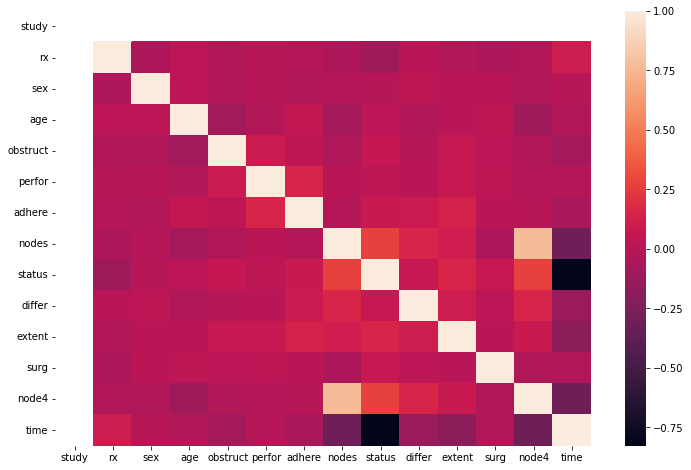

In [ ]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(df.corr(), ax=ax)
plt.show()

In [ ]:
abs(df.corr()["status"])

study            NaN
rx          0.108172
sex         0.003372
age         0.017665
obstruct    0.052551
perfor      0.025272
adhere      0.077102
nodes       0.272449
status      1.000000
differ      0.067806
extent      0.154923
surg        0.069964
node4       0.271774
time        0.827288
Name: status, dtype: float64

In [ ]:
# we can remove the variables which has a very low correlation
X = X.drop(columns = ['sex','surg'])

In [ ]:
# now check again accuracy of the model
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE: 0.3
R_squared: 0.65


In [ ]:
abs(df.corr()["status"][abs(df.corr()["status"])>0.5].drop('status')).index.tolist()

['time']

In [ ]:
vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
for val in vals:
    features = abs(df.corr()["status"][abs(df.corr()["status"])>val].drop('status')).index.tolist()
    
    X = df.drop(columns='status')
    X=X[features]
    
    print(features)

    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
    print("R_squared: " + str(round(r2_score(y,y_pred),2)))

['rx', 'nodes', 'extent', 'node4', 'time']
RMSE: 0.26
R_squared: 0.73
['nodes', 'node4', 'time']
RMSE: 0.26
R_squared: 0.74
['time']
RMSE: 0.24
R_squared: 0.77
['time']
RMSE: 0.24
R_squared: 0.77
['time']
RMSE: 0.24
R_squared: 0.77
['time']
RMSE: 0.24
R_squared: 0.77
['time']
RMSE: 0.24
R_squared: 0.77


<h2>Feature Selection Using a Wrapper</h2>

In [ ]:
df = pd.read_csv("colon.csv")
df=df.dropna()
X = df.drop(columns=['status', 'id', 'study'])
y = df.status
X.columns

Index(['rx', 'sex', 'age', 'obstruct', 'perfor', 'adhere', 'nodes', 'differ',
       'extent', 'surg', 'node4'],
      dtype='object')

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
sfs1 = SFS(classifier_pipeline, 
           k_features=11, 
           forward=True, 
           scoring='neg_mean_squared_error',
           cv=cv)

sfs1.fit(X.values,y.values)

sfs1.subsets_

{1: {'avg_score': -0.24782584269662924,
  'cv_scores': array([-0.25955056, -0.23550562, -0.24516854, -0.26606742, -0.23280899,
         -0.23966292, -0.21325843, -0.24123596, -0.26227273, -0.28272727]),
  'feature_idx': (6,),
  'feature_names': ('6',)},
 2: {'avg_score': -0.23954290091930544,
  'cv_scores': array([-0.23595506, -0.22235955, -0.23786517, -0.26404494, -0.21921348,
         -0.23370787, -0.22932584, -0.26977528, -0.24056818, -0.24261364]),
  'feature_idx': (5, 6),
  'feature_names': ('5', '6')},
 3: {'avg_score': -0.23610061287027578,
  'cv_scores': array([-0.23977528, -0.20741573, -0.24078652, -0.24606742, -0.21235955,
         -0.24764045, -0.21078652, -0.25662921, -0.26125   , -0.23829545]),
  'feature_idx': (5, 6, 10),
  'feature_names': ('5', '6', '10')},
 4: {'avg_score': -0.2417860061287027,
  'cv_scores': array([-0.23022472, -0.23067416, -0.26629213, -0.24910112, -0.23348315,
         -0.24921348, -0.22202247, -0.24730337, -0.25590909, -0.23363636]),
  'feature_idx